## Import and prepare the dataset

In [24]:
import pandas as pd

df_review = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


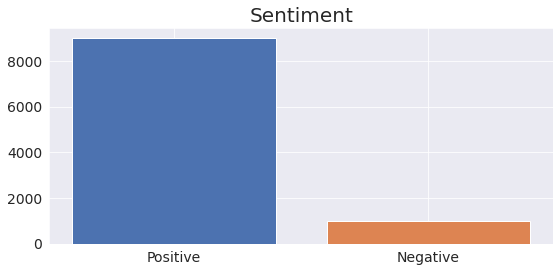

In [25]:
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive, df_negative])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('font', size=14)


colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'], height=df_review_imb.value_counts(['sentiment']), color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')

plt.show()

In [26]:
#Balancing the data set

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']], df_review_imb['sentiment'])

df_review_bal

print(df_review_imb.value_counts('sentiment'))
print('---------------')
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    9000
negative    1000
dtype: int64
---------------
sentiment
negative    1000
positive    1000
dtype: int64


In [27]:
#Splitting the dataset into train and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

## Text representation to numerical vectors using bag of words

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

train_x_vector

test_x_vector = tfidf.transform(test_x)

pd.DataFrame.sparse.from_spmatrix(train_x_vector,index=train_x.index,columns=tfidf.get_feature_names())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Testing the model using four classification models

In [29]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [30]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [31]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [32]:
#Logistic Rgression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

## Models evaluation

In [33]:
#Mean accuracy

print('Support vector machine:', svc.score(test_x_vector, test_y))
print('Decision tree:', dec_tree.score(test_x_vector, test_y))
print('Naive bayes:', gnb.score(test_x_vector.toarray(), test_y))
print('Logical regression:', log_reg.score(test_x_vector, test_y))

Support vector machine: 0.8409090909090909
Decision tree: 0.656060606060606
Naive bayes: 0.6348484848484849
Logical regression: 0.8303030303030303


In [34]:
#F1 score (using the SVC model)

from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'], average=None)

array([0.84671533, 0.83464567])

In [35]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(test_y,svc.predict(test_x_vector), labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [36]:
#Report the number of true positives, true negatives, false positives, and false negatives

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'])

conf_mat

array([[290,  45],
       [ 60, 265]])

## Model optimization using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

#set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
